In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
#from jax_unirep import get_reps
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
bcell_sars = pd.read_csv("../data/bcell_sars_processed.csv")
bcell_sars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target,set_outcome,peptide_length,protein_length
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1,bcell_1,5,397
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1,bcell_1,5,336
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1,bcell_1,5,207
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1,bcell_1,5,1005
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1,bcell_1,5,260


In [19]:
print(bcell_sars.peptide_length.value_counts())
len(bcell_sars.peptide_length.value_counts())

15     4821
10     3755
8      2159
12     1190
9      1151
13      469
7       320
14      277
6       269
11      166
17      133
5        76
18       36
16       20
20       11
22        8
26        6
21        5
24        4
50        4
48        2
136       2
31        2
23        2
35        2
28        2
30        2
19        2
42        1
393       1
33        1
25        1
67        1
144       1
316       1
157       1
40        1
32        1
86        1
Name: peptide_length, dtype: int64


39

## only preserve seq whose peptide length <LENGTH_CUTOFF

In [20]:
LENGTH_CUTOFF = 16

Print out stats on included length entries

In [21]:
bcell_sars[bcell_sars['peptide_length']<LENGTH_CUTOFF].shape#peptide_length.value_counts()
print('the sequences that are going to be excluded are with length')
print(bcell_sars[bcell_sars['peptide_length']>LENGTH_CUTOFF].peptide_length.value_counts())
print('the outcome of sequences that are going to be excluded are')
print(bcell_sars[bcell_sars['peptide_length']>LENGTH_CUTOFF].set_outcome.value_counts())
bcell_sars[bcell_sars['peptide_length']<LENGTH_CUTOFF].set_outcome.value_counts()

the sequences that are going to be excluded are with length
17     133
18      36
20      11
22       8
26       6
21       5
50       4
24       4
35       2
30       2
31       2
48       2
23       2
19       2
136      2
28       2
25       1
157      1
144      1
33       1
40       1
42       1
316      1
67       1
86       1
393      1
32       1
Name: peptide_length, dtype: int64
the outcome of sequences that are going to be excluded are
sars_0    146
sars_1     88
Name: set_outcome, dtype: int64


bcell_0    10485
bcell_1     3902
sars_0       224
sars_1        42
Name: set_outcome, dtype: int64

Print out stat on excluded entries

In [7]:
bcell_sars = bcell_sars[bcell_sars['peptide_length']<LENGTH_CUTOFF]
bcell_sars['peptide_length']

0         5
1         5
2         5
3         5
4         5
         ..
14898    15
14900    15
14902    15
14905    15
14906    15
Name: peptide_length, Length: 14653, dtype: int64

Draw plots of distribution of excluded peptides

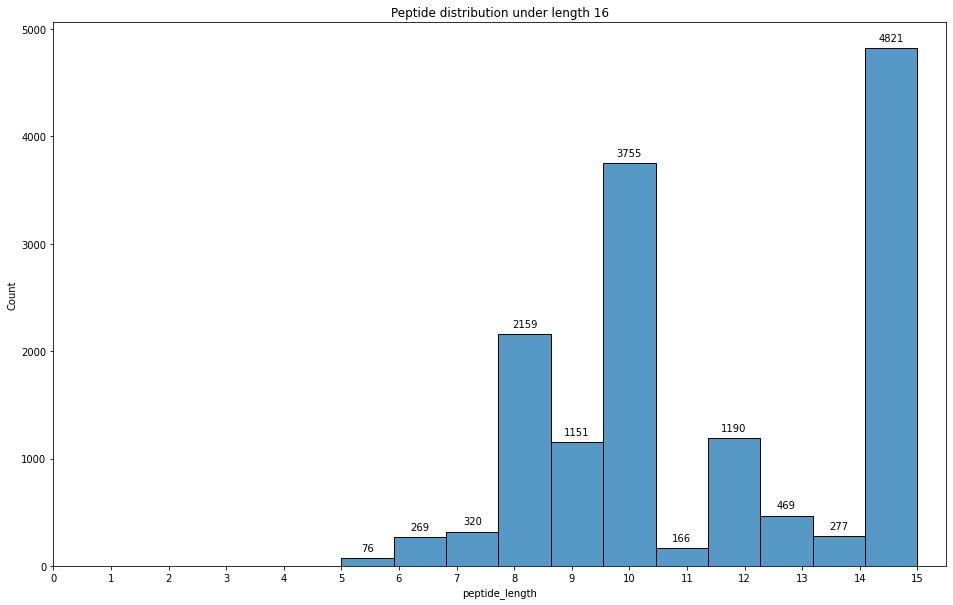

In [9]:
fig, ax = plt.subplots(figsize=(16, 10))
g = sns.histplot(bcell_sars['peptide_length'], bins =len(set(bcell_sars['peptide_length'])))
g.set_title(f"Peptide distribution under length {LENGTH_CUTOFF}")
g.set(xticks=list(range(max(bcell_sars['peptide_length'])+1)))
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')

In [10]:
bcell_sars.shape
bcell_sars.set_outcome.value_counts()

bcell_0    10485
bcell_1     3902
sars_0       224
sars_1        42
Name: set_outcome, dtype: int64

### find if there is any peptide sequence that overlaps with other entries but have a different outcome

In [11]:
#https://stackoverflow.com/questions/35558105/find-rows-that-have-same-values-in-another-column-python
group = bcell_sars.groupby('peptide_seq')['set_outcome'].unique()
group[group.apply(lambda x: len(x)>1)]
#ARDVLAVVSK         [bcell_1, bcell_0]
#FAVLKLMGRGTKF      [bcell_1, bcell_0]
####KCYGVSATKL          [bcell_0, sars_1] ***
####NYNYKYRYLR          [bcell_0, sars_1] ***
####PLKPTKRSFIEDLLF     [bcell_1, sars_0] ***
#TYFSKNYQDYEY       [bcell_1, bcell_0]
#YEYLINVIHAFQYV     [bcell_1, bcell_0]


peptide_seq
ADAGFMKQYGECLGD     [bcell_0, sars_0]
ARDVLAVVSK         [bcell_1, bcell_0]
ATEKSNVVRGWV        [bcell_1, sars_1]
ATKLNDLCFSNVYAD     [bcell_0, sars_0]
DGFLYVYKGYQPIDV     [bcell_0, sars_0]
DVSEKSGNFKHLREF     [bcell_0, sars_0]
FAVLKLMGRGTKF      [bcell_1, bcell_0]
FEYISDAFSLDVSEK     [bcell_0, sars_0]
GAGICASY            [bcell_1, sars_1]
GDVVRFPNITNLCPF     [bcell_0, sars_0]
HEGKAYFPREGV        [bcell_1, sars_1]
HLREFVFKNKDGFLY     [bcell_0, sars_0]
KCYGVSATKL          [bcell_0, sars_1]
KLRPFERDI           [bcell_1, sars_1]
KLRPFERDISNV        [bcell_1, sars_1]
KSFEIDKGIYQTSNF     [bcell_0, sars_0]
LYQDVNC             [bcell_1, sars_1]
LYQDVNCT            [bcell_1, sars_1]
MIFDNAFNCTFEYIS     [bcell_0, sars_0]
NLCPFGEVFNATKFP     [bcell_0, sars_0]
NTRNIDATSTGN        [bcell_1, sars_1]
NVYADSFVVKGDDVR     [bcell_0, sars_0]
NYNYKYRYLR          [bcell_0, sars_1]
PDPLKPTKR           [bcell_1, sars_1]
PDPLKPTKRSF         [bcell_0, sars_0]
PFSPDGKPCTPP        [bcell_1, sars_1]


#### instead of padding, extract peptide with same length from the parent protein sequence

In [23]:
# reset bcell_sars index and remove the old index from being generated as a new cabsol
bcell_sars = bcell_sars.reset_index(drop=True)

In [28]:
bcell_sars['extracted_peptide_seq'] =0
for row in range(len(bcell_sars['extracted_peptide_seq'])):
    if bcell_sars.loc[row, 'peptide_length']!=15:
        len_to_fill = 15 - bcell_sars.loc[row, 'peptide_length']
        left_to_fill = len_to_fill//2
        right_to_fill = len_to_fill -left_to_fill
        new_peptide = bcell_sars.loc[row, 'protein_seq'][bcell_sars.loc[row,'start_position']-left_to_fill : bcell_sars.loc[row,'end_position']+
                                               right_to_fill +1 ]
        bcell_sars.loc[row,'extracted_peptide_seq'] = new_peptide
    else:
        bcell_sars.loc[row,'extracted_peptide_seq'] = bcell_sars.loc[row, 'peptide_seq']


In [29]:
# check that all are 15 AA long in the extract_peptide_seabsq
# it turned out this dataset has many mistakes in start_position and end position, it doesn't match to the ones in the data
[len(bcell_sars.loc[i,'extracted_peptide_seq']) for i in range(bcell_sars.shape[0]) ]

[15,
 15,
 15,
 15,
 15,
 15,
 15,
 12,
 15,
 15,
 15,
 0,
 15,
 11,
 2,
 15,
 15,
 15,
 15,
 9,
 15,
 15,
 15,
 15,
 15,
 0,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 9,
 15,
 15,
 0,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 0,
 0,
 11,
 9,
 15,
 14,
 2,
 9,
 9,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 11,
 15,
 15,
 15,
 15,
 15,
 13,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 9,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 9,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 0,
 15,
 15,
 15,
 15,
 0,
 12,
 0,
 1

#### find the correct start and end position of peptide sequence in protein sequence

In [30]:
bcell_sars.loc[:,'correct_start_pos'] =0
bcell_sars.loc[:,'correct_end_pos'] =0
for row in range(len(bcell_sars['correct_start_pos'])):
    bcell_sars.loc[row,'correct_start_pos'] = bcell_sars.loc[row,'protein_seq'].find(bcell_sars.loc[row,'peptide_seq'])
    bcell_sars.loc[row,'correct_end_pos'] = bcell_sars.loc[row,'correct_start_pos'] + bcell_sars.loc[row,'peptide_length']

In [31]:
bcell_sars.loc[:, ['start_position','correct_start_pos', 'end_position', 'correct_end_pos']]

,start_position,correct_start_pos,end_position,correct_end_pos
0,161,160,165,165
1,251,250,255,255
2,145,144,149,149
3,152,151,156,156
4,85,84,89,89
...,...,...,...,...
14648,1221,1220,1235,1235
14649,1226,1225,1240,1240
14650,1231,1230,1245,1245
14651,1236,1235,1250,1250


#### Re-extract peptides from parent protein sequence

In [32]:
bcell_sars['extracted_peptide_seq'] =0
for row in range(len(bcell_sars['extracted_peptide_seq'])):
    if bcell_sars.loc[row, 'peptide_length']!=15:
        len_to_fill = 15 - bcell_sars.loc[row, 'peptide_length']
        left_to_fill = len_to_fill//2
        right_to_fill = len_to_fill -left_to_fill
        new_peptide = bcell_sars.loc[row, 'protein_seq'][bcell_sars.loc[row,'correct_start_pos']-left_to_fill : bcell_sars.loc[row,'correct_end_pos']+
                                               right_to_fill ]
        bcell_sars.loc[row,'extracted_peptide_seq'] = new_peptide
    else:
        bcell_sars.loc[row,'extracted_peptide_seq'] = bcell_sars.loc[row, 'peptide_seq']

In [33]:
# still has peptide whose len <15, but this is becuase the parent protein is shorter to make peptide len as 15
bcell_sars['len_extracted_peptide_seq'] = [len(bcell_sars.loc[i,'extracted_peptide_seq']) for i in range(bcell_sars.shape[0]) ]

In [34]:
# extract only the rows whose extracted peptide seq is 15
bcell_sars = bcell_sars[bcell_sars['len_extracted_peptide_seq']== (LENGTH_CUTOFF-1)]

In [35]:
bcell_sars['len_extracted_peptide_seq'].value_counts()

15    14381
Name: len_extracted_peptide_seq, dtype: int64

### split data into train, val, test

In [36]:
def get_train_val_test(outcome_pos, outcome_neg):
    """split data into train, val, test and shuffle the rows
        :param outcome_pos: positive outcome label
        :param outcome_neg: negative outcome label
    """
    pos = bcell_sars.loc[bcell_sars['set_outcome'] == outcome_pos]
    neg = bcell_sars.loc[bcell_sars['set_outcome'] == outcome_neg]
    pos_train = pos.sample(frac=0.75)
    pos_val = pos.sample(frac=0.15)
    pos_test = pos.sample(frac=0.1)
    neg_train = neg.sample(frac=0.75)
    neg_val = neg.sample(frac=0.15)
    neg_test = neg.sample(frac=0.1)
    # combine train, val and test and shuffle rows
    train = pd.concat([pos_train,neg_train]).sample(frac = 1)
    val = pd.concat([pos_val,neg_val]).sample(frac = 1)
    test = pd.concat([pos_test,neg_test]).sample(frac = 1)
    return train, val, test

In [37]:
bcell_train, bcell_val, bcell_test = get_train_val_test("bcell_0","bcell_1")
sars_train, sars_val, sars_test = get_train_val_test("sars_0", "sars_1")

In [38]:
print(sum(bcell_train['target']==1),sum(bcell_train['target']==0))

2842 7744


In [39]:
bcell_train.to_csv("../data/bcell_train.csv", index=False)
bcell_val.to_csv("../data/bcell_val.csv", index=False)
bcell_test.to_csv("../data/bcell_test.csv", index=False)

sars_train.to_csv("../data/sars_train.csv", index=False)
sars_val.to_csv("../data/sars_val.csv", index=False)
sars_test.to_csv("../data/sars_test.csv", index=False)